In [1]:
# Problem 3: Word-level French ➜ English with Attention

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SOS_token = 0
EOS_token = 1


english_to_french = [

    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")

]



french_to_english = [(fr, en) for en, fr in english_to_french]

def build_vocab(sentences):
    word2index = {"<SOS>": SOS_token, "<EOS>": EOS_token}
    idx = 2
    for sentence in sentences:
        for word in sentence.strip().split():
            if word not in word2index:
                word2index[word] = idx
                idx += 1
    return word2index

french_vocab = build_vocab([fr for fr, _ in french_to_english])
english_vocab = build_vocab([en for _, en in french_to_english])
index_to_english = {i: w for w, i in english_vocab.items()}
index_to_french = {i: w for w, i in french_vocab.items()}

def encode(sentence, vocab):
    return [vocab[word] for word in sentence.split()] + [EOS_token]

def pad(seq, max_len):
    return seq + [EOS_token] * (max_len - len(seq))

max_len_fr = max(len(fr.split()) for fr, _ in french_to_english) + 1
max_len_en = max(len(en.split()) for _, en in french_to_english) + 1

class FrenchToEnglishDataset(Dataset):
    def __init__(self, pairs):
        self.data = []
        for fr, en in pairs:
            enc = pad(encode(fr, french_vocab), max_len_fr)
            dec = pad(encode(en, english_vocab), max_len_en)
            self.data.append((torch.tensor(enc), torch.tensor(dec)))
    def __len__(self): return len(self.data)
    def __getitem__(self, idx): return self.data[idx]

dataloader = DataLoader(FrenchToEnglishDataset(french_to_english), batch_size=1, shuffle=True)



In [2]:

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.hidden_size = hidden_size
    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden
    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

class AttnDecoder(nn.Module):
    def __init__(self, hidden_size, output_size, max_length, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attn = nn.Linear(hidden_size * 2, max_length)
        self.attn_combine = nn.Linear(hidden_size * 2, hidden_size)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)
        attn_weights = torch.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)
        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)
        output = torch.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights



In [3]:

hidden_size = 256
encoder = Encoder(len(french_vocab), hidden_size).to(device)
decoder = AttnDecoder(hidden_size, len(english_vocab), max_len_fr).to(device)
encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.01)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.01)
criterion = nn.NLLLoss()

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    encoder_hidden = encoder.initHidden()
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)
    encoder_outputs = torch.zeros(max_len_fr, hidden_size, device=device)
    loss = 0
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]
    decoder_input = torch.tensor([SOS_token], device=device)
    decoder_hidden = encoder_hidden
    for di in range(target_length):
        decoder_output, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:
            break
    loss.backward()
    encoder_optimizer.step()
    decoder_optimizer.step()
    return loss.item()

def evaluate(encoder, decoder, dataloader, criterion):
    encoder.eval()
    decoder.eval()
    total_loss, total_correct, total_samples = 0, 0, 0
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            encoder_hidden = encoder.initHidden()
            encoder_outputs = torch.zeros(max_len_fr, hidden_size, device=device)
            for ei in range(input_tensor.size(0)):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]
            decoder_input = torch.tensor([SOS_token], device=device)
            decoder_hidden = encoder_hidden
            predicted, loss = [], 0
            for di in range(target_tensor.size(0)):
                decoder_output, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze().detach()
                predicted.append(topi.item())
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            total_loss += loss.item()
            tgt = target_tensor.tolist()
            if EOS_token in tgt: tgt = tgt[:tgt.index(EOS_token)+1]
            if EOS_token in predicted: predicted = predicted[:predicted.index(EOS_token)+1]
            if predicted == tgt: total_correct += 1
            total_samples += 1
    return total_loss / total_samples, total_correct / total_samples


num_epochs = 100
train_losses, val_losses, val_accuracies = [], [], []

for epoch in range(num_epochs):
    encoder.train()
    decoder.train()
    total_loss = 0
    for input_tensor, target_tensor in dataloader:
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_loss += loss
    avg_train_loss = total_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    val_loss, val_acc = evaluate(encoder, decoder, dataloader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2%}")



Epoch 1/100 | Train Loss: 21.7326 | Val Loss: 38.3619 | Val Acc: 0.00%
Epoch 2/100 | Train Loss: 21.9818 | Val Loss: 13.6427 | Val Acc: 0.00%
Epoch 3/100 | Train Loss: 22.9579 | Val Loss: 37.9833 | Val Acc: 0.00%
Epoch 4/100 | Train Loss: 22.9049 | Val Loss: 21.8885 | Val Acc: 0.00%
Epoch 5/100 | Train Loss: 23.3157 | Val Loss: 33.6593 | Val Acc: 0.00%
Epoch 6/100 | Train Loss: 24.9122 | Val Loss: 30.8146 | Val Acc: 0.00%
Epoch 7/100 | Train Loss: 25.1512 | Val Loss: 48.2233 | Val Acc: 0.00%
Epoch 8/100 | Train Loss: 29.8368 | Val Loss: 55.0226 | Val Acc: 0.00%
Epoch 9/100 | Train Loss: 31.7212 | Val Loss: 38.8612 | Val Acc: 0.00%
Epoch 10/100 | Train Loss: 34.6518 | Val Loss: 34.3984 | Val Acc: 0.00%
Epoch 11/100 | Train Loss: 36.8976 | Val Loss: 39.7756 | Val Acc: 0.00%
Epoch 12/100 | Train Loss: 35.1014 | Val Loss: 54.4798 | Val Acc: 0.00%
Epoch 13/100 | Train Loss: 36.3512 | Val Loss: 52.9062 | Val Acc: 0.00%
Epoch 14/100 | Train Loss: 38.7355 | Val Loss: 30.0353 | Val Acc: 0.00%
E

In [7]:
def translate(encoder, decoder, sentence, max_length=20):
    encoder.eval()
    decoder.eval()

    # Tokenize and encode the French input sentence
    tokens = sentence.strip().split()
    encoded = [french_vocab.get(word, EOS_token) for word in tokens]
    encoded = pad(encoded, max_len_fr)  # pad to match training length
    input_tensor = torch.tensor(encoded, dtype=torch.long, device=device)

    with torch.no_grad():
        encoder_hidden = encoder.initHidden()
        encoder_outputs = torch.zeros(max_len_fr, encoder.hidden_size, device=device)

        for ei in range(input_tensor.size(0)):
            encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([SOS_token], device=device)
        decoder_hidden = encoder_hidden
        translated_words = []

        for _ in range(max_length):
            decoder_output, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            next_word_idx = topi.item()
            if next_word_idx == EOS_token:
                break
            translated_words.append(index_to_english.get(next_word_idx, "<UNK>"))
            decoder_input = topi.squeeze().detach()

    return " ".join(translated_words)



In [8]:
test_sentences = [
    "J'ai froid",
    "Elle est heureuse",
    "Ils jouent au football chaque week-end",
    "Nous aimons la musique",
    "Le chat dort"
]

target_translations = [
    "I am cold",
    "She is happy",
    "They play soccer every weekend",
    "We love music",
    "The cat is sleeping"
]

print("\n--- Problem 3: French ➜ English Translation Test ---")
for fr, target in zip(test_sentences, target_translations):
    output = translate(encoder, decoder, fr)
    print(f"FRENCH  : {fr}")
    print(f"PREDICT : {output}")
    print(f"TARGET  : {target}")
    print("-" * 50)




--- Problem 3: French ➜ English Translation Test ---
FRENCH  : J'ai froid
PREDICT : I
TARGET  : I am cold
--------------------------------------------------
FRENCH  : Elle est heureuse
PREDICT : He is
TARGET  : She is happy
--------------------------------------------------
FRENCH  : Ils jouent au football chaque week-end
PREDICT : They play every
TARGET  : They play soccer every weekend
--------------------------------------------------
FRENCH  : Nous aimons la musique
PREDICT : We love music
TARGET  : We love music
--------------------------------------------------
FRENCH  : Le chat dort
PREDICT : The is
TARGET  : The cat is sleeping
--------------------------------------------------


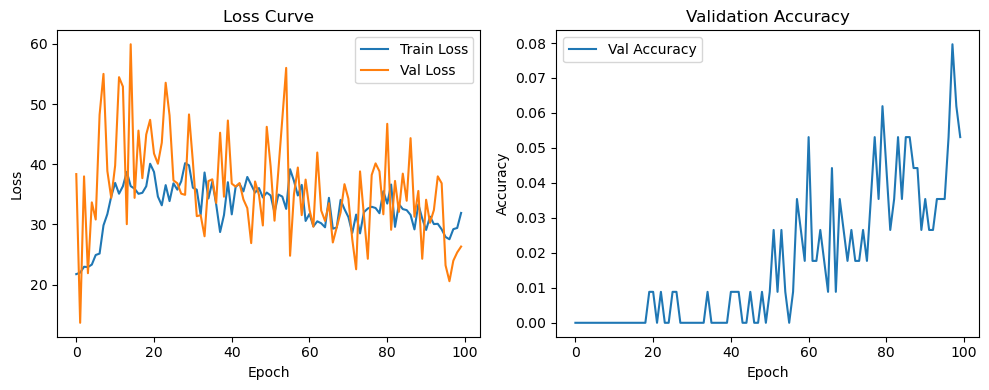

In [9]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
test_sentences = [
    "Je suis heureux",
    "Le chien aboie",
    "Nous regardons la télé",
    "Elle lit un livre",
    "Ils boivent de l'eau"
]

target_translations = [
    "I am happy",
    "The dog is barking",
    "We watch TV",
    "She reads a book",
    "They drink water"
]

print("\n--- Problem 3: French ➜ English Translation Test (New Sentences) ---")
for fr, target in zip(test_sentences, target_translations):
    output = translate(encoder, decoder, fr)
    print(f"FRENCH  : {fr}")
    print(f"PREDICT : {output}")
    print(f"TARGET  : {target}")
    print("-" * 50)



--- Problem 3: French ➜ English Translation Test (New Sentences) ---
FRENCH  : Je suis heureux
PREDICT : 
TARGET  : I am happy
--------------------------------------------------
FRENCH  : Le chien aboie
PREDICT : The swims
TARGET  : The dog is barking
--------------------------------------------------
FRENCH  : Nous regardons la télé
PREDICT : The
TARGET  : We watch TV
--------------------------------------------------
FRENCH  : Elle lit un livre
PREDICT : They teaches
TARGET  : She reads a book
--------------------------------------------------
FRENCH  : Ils boivent de l'eau
PREDICT : The swims
TARGET  : They drink water
--------------------------------------------------
